In [111]:
import tensorflow as tf 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [112]:
IMAGE_SIZE = 256
CHANNELS = 3 

In [113]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
)

train_img_gen = train_gen.flow_from_directory(
        '../dataset/train',
        target_size=(256, 256),
        batch_size=32,
        class_mode='sparse',
)

Found 1506 images belonging to 3 classes.


In [114]:
class_names = list(train_img_gen.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

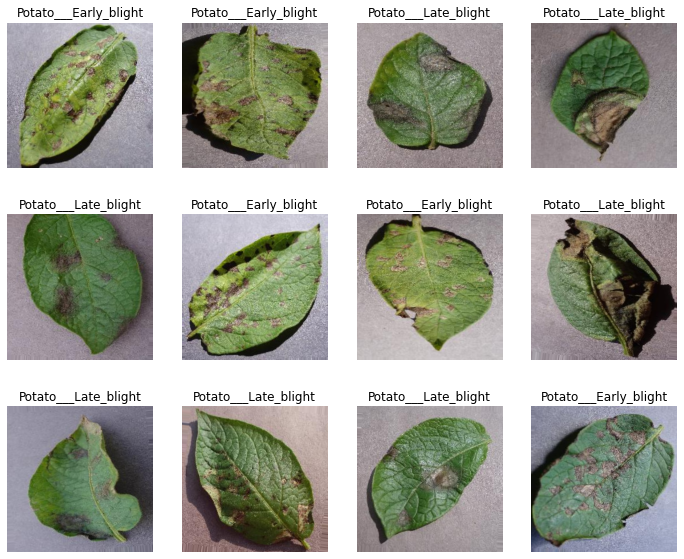

In [115]:
for image_batch, label_batch in train_img_gen:
    plt.figure(figsize=(12,10))
    for i in range(12):   
         plt.subplot(3,4,i+1)
         plt.imshow(image_batch[i])
         plt.title(class_names[int(label_batch[i])])
         plt.axis('off')
    break

In [116]:

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
)

val_img_gen = train_gen.flow_from_directory(
        '../dataset/val',
        target_size=(256, 256),
        batch_size=32,
        class_mode='sparse',
)

Found 215 images belonging to 3 classes.


In [117]:

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
)

test_img_gen = train_gen.flow_from_directory(
        '../dataset/test',
        target_size=(256, 256),
        batch_size=32,
        class_mode='sparse',
)

Found 431 images belonging to 3 classes.


In [118]:
from tensorflow.keras import models
from tensorflow.keras import layers 

In [119]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

In [120]:
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [121]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics='accuracy')

In [122]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 64)      

In [123]:
steps_epoch = 1506/32
steps_epoch
215/32

6.71875

In [124]:
from tensorflow.keras.callbacks import EarlyStopping 

In [125]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [126]:
history = model.fit(
    train_img_gen,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=val_img_gen,
    validation_steps=6,
    verbose=1,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
47/47 [==============================] - 70s 1s/step - loss: 0.9394 - accuracy: 0.4607 - val_loss: 0.9328 - val_accuracy: 0.4635
Epoch 2/20
47/47 [==============================] - 84s 2s/step - loss: 0.9028 - accuracy: 0.4674 - val_loss: 0.8674 - val_accuracy: 0.4740
Epoch 3/20
47/47 [==============================] - 84s 2s/step - loss: 0.8009 - accuracy: 0.5834 - val_loss: 0.7268 - val_accuracy: 0.6667
Epoch 4/20
47/47 [==============================] - 88s 2s/step - loss: 0.7062 - accuracy: 0.6811 - val_loss: 0.7174 - val_accuracy: 0.6771
Epoch 5/20
47/47 [==============================] - 95s 2s/step - loss: 0.5698 - accuracy: 0.7653 - val_loss: 0.5957 - val_accuracy: 0.7396
Epoch 6/20
47/47 [==============================] - 86s 2s/step - loss: 0.5388 - accuracy: 0.7815 - val_loss: 0.4324 - val_accuracy: 0.8438
Epoch 7/20
47/47 [==============================] - 90s 2s/step - loss: 0.4509 - accuracy: 0.8094 - val_loss: 0.4046 - val_accuracy: 0.8750
Epoch 8/20
47/47 [==

In [128]:
history.history


{'loss': [0.9394091367721558,
  0.902804970741272,
  0.8008760809898376,
  0.7062203288078308,
  0.569791853427887,
  0.5388267040252686,
  0.4508664011955261,
  0.3667500615119934,
  0.29161176085472107,
  0.23725315928459167,
  0.21767853200435638,
  0.1907106190919876,
  0.14963427186012268,
  0.15235088765621185,
  0.14603576064109802,
  0.15894214808940887],
 'accuracy': [0.4606512784957886,
  0.4674355387687683,
  0.5834463834762573,
  0.6811397671699524,
  0.7652645707130432,
  0.7815468311309814,
  0.8093622922897339,
  0.8643147945404053,
  0.886702835559845,
  0.9158751964569092,
  0.9260515570640564,
  0.9321573972702026,
  0.9416553378105164,
  0.9497964978218079,
  0.9525101780891418,
  0.9409769177436829],
 'val_loss': [0.9328262209892273,
  0.867396891117096,
  0.7268168330192566,
  0.717372715473175,
  0.5956695675849915,
  0.43242311477661133,
  0.4046405255794525,
  0.41945233941078186,
  0.2716243267059326,
  0.24829800426959991,
  0.15939868986606598,
  0.1336705833

In [130]:
model.evaluate(test_img_gen)

14/14 [==============================] - 9s 594ms/step - loss: 0.1055 - accuracy: 0.9536


[0.10551709681749344, 0.953596293926239]

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


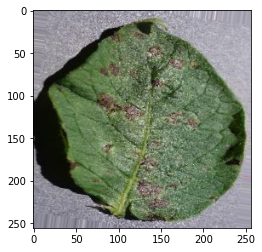

In [134]:

for image_batch, label_batch in test_img_gen:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [135]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

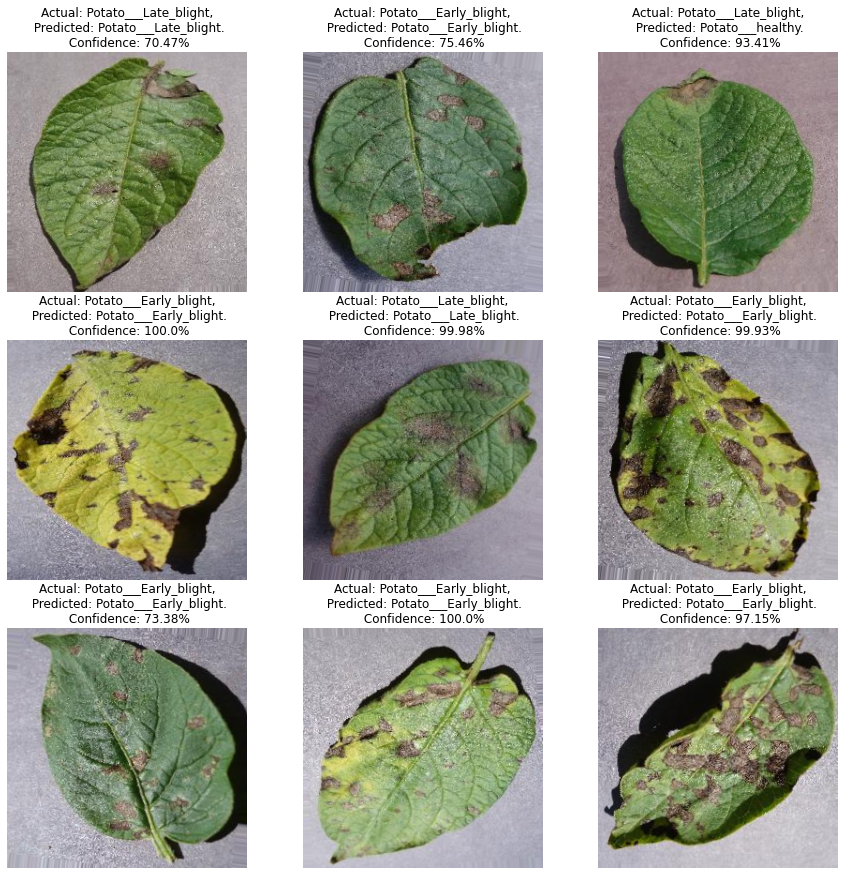

In [138]:
plt.figure(figsize=(15, 15))
for images, labels in test_img_gen:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
model.save(../model2.h5)